## En este notebook examinamos la calidad de los datos y seguimos con la exploración.

### Examen del límite de crédito(Limit_Bal) y las características demográficas.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 200 #resolución gráficos

In [15]:
df= pd.read_csv('df_clean_2.csv')

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Visualicemos mediante histogramas las variables LIMIT_BAL Y AGE:

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

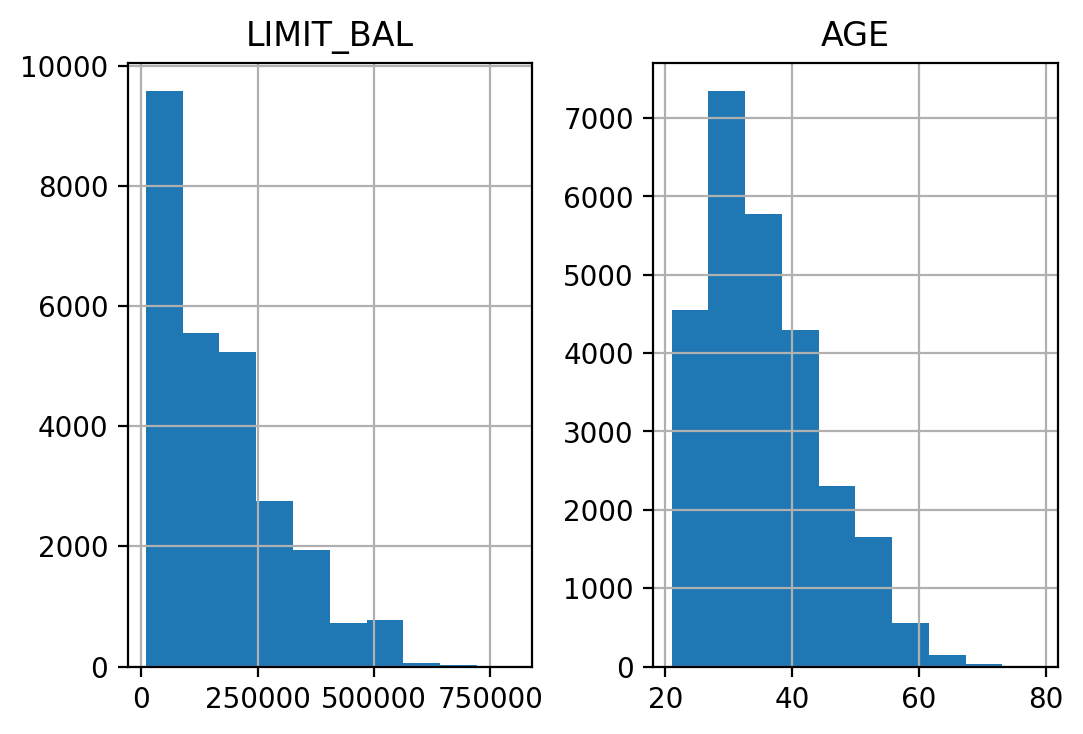

In [17]:
df[['LIMIT_BAL', 'AGE']].hist()

La mayoría de los clientes son treintañeros. Se observa que no hay clientes de crédito menores de 22 años (aprox).

In [18]:
df[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [19]:
df['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Los niveles 0,5 y 6 están indocumentados!. Los cambiaremos al nivel 4=others:

In [20]:
df['EDUCATION'].replace(to_replace=[0, 5, 6],\
value=4, inplace=True)

In [21]:
df['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [22]:
df['SEX'].value_counts()

2    16080
1    10584
Name: SEX, dtype: int64

La mayoría de los clientes son mujeres.

In [23]:
df['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

El valor 0 está indocumentado. Lo cambiaremos por 3=others

In [24]:
df['MARRIAGE'].replace(to_replace=0, value=3,inplace=True)


In [25]:
df['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Estudio variable EDUCATION

Text(0.5, 0, 'Education level: ordinal encoding')

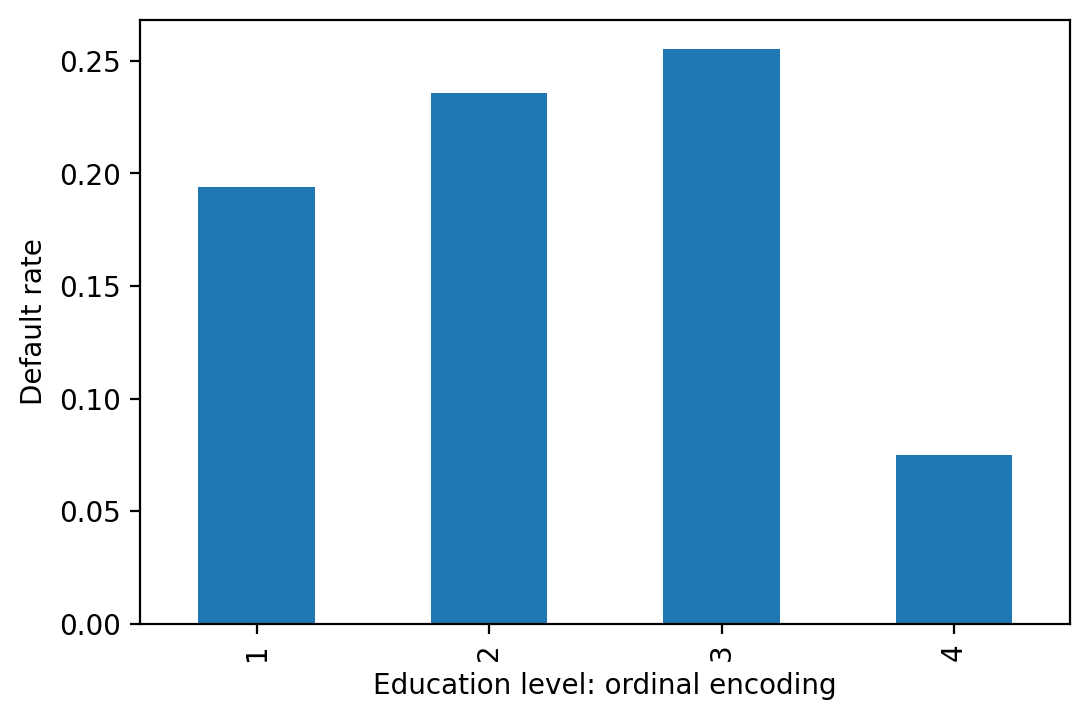

In [26]:
df.groupby('EDUCATION').agg({'default payment next month':'mean'})\
.plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Hay un efecto no-lineal con la variable objetivo. En este caso, sería mejor usar un algoritmo más complejo, como decision tree o random forest. Codificaremos esta variable según One Hot Encoding(OHE): 

In [27]:
cat_mapping = {1: "graduate school",\
2: "university",\
3: "high school",\
4: "others"}

In [28]:
df['EDUCATION_CAT'] = df['EDUCATION'].map(cat_mapping)

In [29]:
df[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [30]:
edu_ohe = pd.get_dummies(df['EDUCATION_CAT'])

In [31]:
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


Esto agrega entonces 4 variables más al análisis. Uniremos estas columnas con el DataFrame:

In [32]:
df_with_ohe = pd.concat([df, edu_ohe], axis=1)

In [33]:
df_with_ohe.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


Guardamos el análisis en : df_clean_3.csv

In [34]:
df_with_ohe.to_csv('df_clean_3.csv',
index=False)